## Задание 1

## Создание и вывод датасетоу:

In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

In [216]:
data1, data_y1 = make_classification(n_samples=500, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=110)

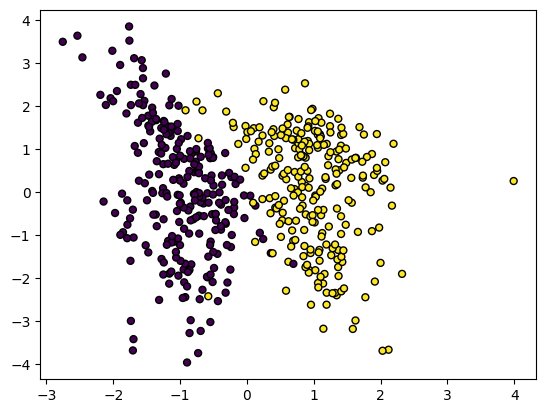

In [217]:
plt.scatter(data1[:, 0], data1[:, 1], marker="o", c=data_y1, s=25, edgecolor="k")
plt.show()

In [218]:
data2, data_y2 = make_classification(n_samples=600, n_classes=3, n_features=5, n_redundant=0,n_informative=4, n_clusters_per_class=3, flip_y=0, random_state=110)

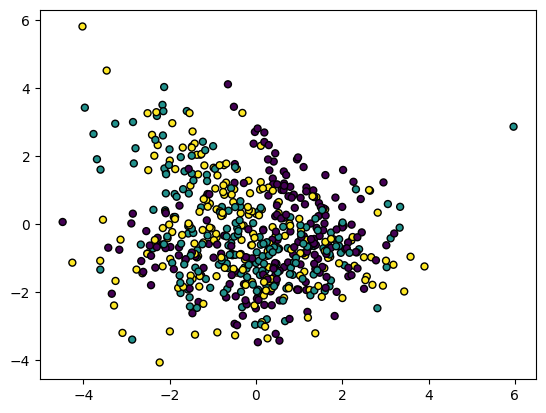

In [219]:
plt.scatter(data2[:, 0], data2[:, 1], marker="o", c=data_y2, s=25, edgecolor="k")
plt.show()

In [220]:
data3, data_y3 = make_classification(n_samples=600, n_classes=4, n_features=5, n_redundant=0,n_informative=4 , n_clusters_per_class=4, flip_y=0, random_state=110)

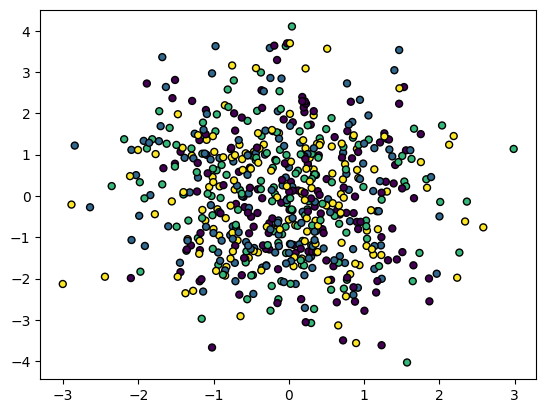

In [221]:
plt.scatter(data3[:, 0], data3[:, 1], marker="o", c=data_y3, s=25, edgecolor="k")
plt.show()

## Kmeans:

In [10]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

parameters = {'n_clusters': np.arange(2, 5, 1)}

KMeans_optimal1 = RandomizedSearchCV(KMeans(), parameters).fit(data1)
KMeans_optimal1.best_params_

NameError: name 'data1' is not defined

In [223]:
kmeans1 = KMeans(KMeans_optimal1.best_params_['n_clusters'], n_init='auto').fit(data1)

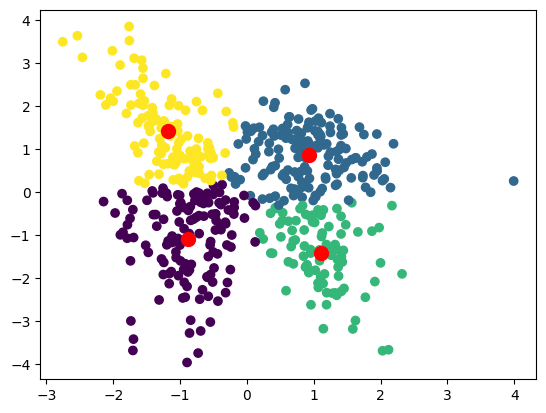

In [224]:
plt.scatter(data1[:,0], data1[:,1], c=kmeans1.labels_)
plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,1], s=100, c='red')

Первый датасет разбили на 4 класса, ёшки-матрёшки

In [225]:
KMeans_optimal2 = RandomizedSearchCV(KMeans(), parameters).fit(data2)
KMeans_optimal2.best_params_

C:\Users\1\Jupyter Notebook\venv\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\1\Jupyter Notebook\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\1\Jupyter Notebook\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\1\Jupyter Notebook\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\1\Jupyter Note

{'n_clusters': 4}

In [226]:
kmeans2 = KMeans(KMeans_optimal2.best_params_['n_clusters'], n_init='auto').fit(data2)

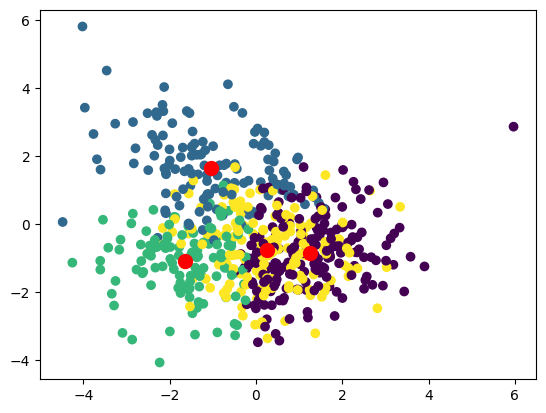

In [227]:
plt.scatter(data2[:,0], data2[:,1], c=kmeans2.labels_)
plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], s=100, c='red')


In [228]:
KMeans_optimal3 = RandomizedSearchCV(KMeans(), parameters).fit(data3)
KMeans_optimal3.best_params_

C:\Users\1\Jupyter Notebook\venv\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\1\Jupyter Notebook\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\1\Jupyter Notebook\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\1\Jupyter Notebook\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\1\Jupyter Note

{'n_clusters': 4}

In [229]:
kmeans3 = KMeans(KMeans_optimal3.best_params_['n_clusters'], n_init='auto').fit(data3)

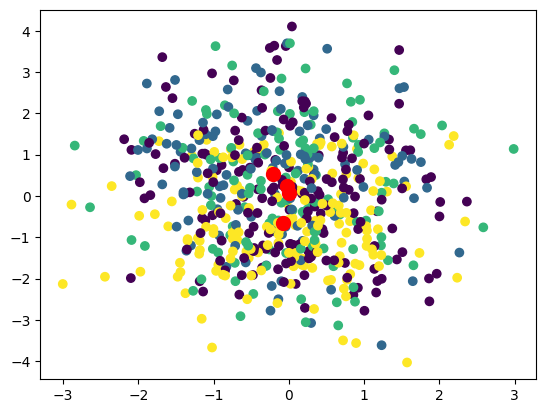

In [230]:
plt.scatter(data3[:,0], data3[:,1], c=kmeans3.labels_)
plt.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], s=100, c='red')

На глаз последние 2 разбиения похожи на изначальные, посмотрим метрики

In [231]:
from sklearn.metrics.cluster import rand_score

print(f"Результаты первого теста {rand_score(kmeans1.labels_, data_y1)}")
print(f"Результаты второго теста {rand_score(kmeans2.labels_, data_y2)}")
print(f"Результаты третьего теста {rand_score(kmeans3.labels_, data_y3)}")

Результаты первого теста 0.7191102204408818
Результаты второго теста 0.6007846410684474
Результаты третьего теста 0.6844240400667779


Вот ето да, первый получился самым точным...
Посмотрим, шо с силуэтом

In [232]:
from sklearn.metrics import silhouette_score

print(f"Результаты первого теста {silhouette_score(data1, kmeans1.labels_)}")
print(f"Результаты второго теста {silhouette_score(data2, kmeans2.labels_)}")
print(f"Результаты третьего теста {silhouette_score(data3, kmeans3.labels_)}")

Результаты первого теста 0.42617005940902297
Результаты второго теста 0.18344263350019452
Результаты третьего теста 0.1701333393832724


Как же я мог забыть про методы локтя и силуэта, сейчас благодоря им подберём что да как

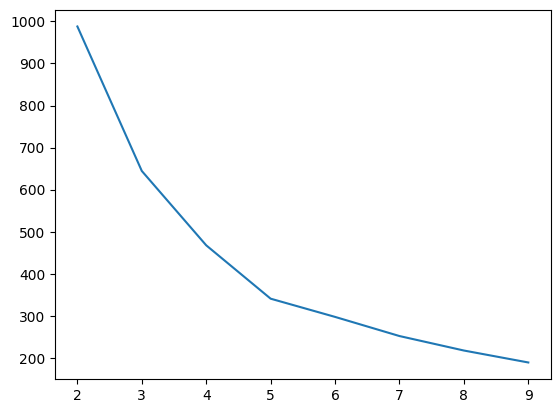

In [233]:
inertias = []

for i in range(2, 10):
  m = KMeans(i, n_init='auto').fit(data1)
  inertias.append(m.inertia_)

plt.plot(range(2,10), inertias)

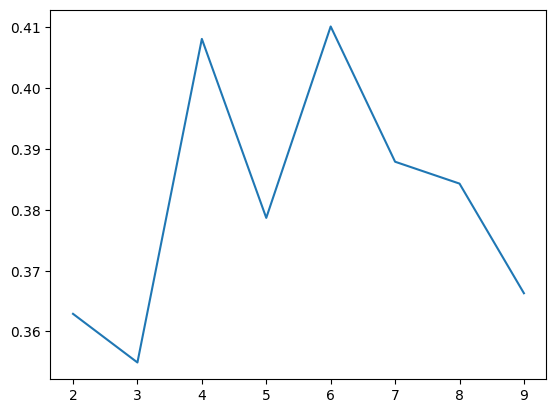

In [234]:
ss = []

for i in range(2, 10):
  ss.append(silhouette_score(data1, KMeans(i, n_init='auto').fit(data1).labels_))

plt.plot(range(2,10), ss)

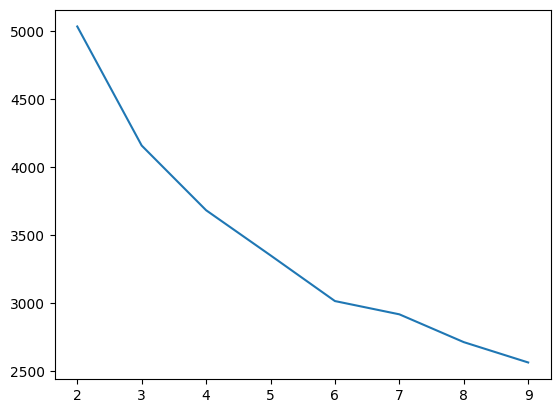

In [235]:
inertias = []

for i in range(2, 10):
  m = KMeans(i, n_init='auto').fit(data2)
  inertias.append(m.inertia_)

plt.plot(range(2,10), inertias)

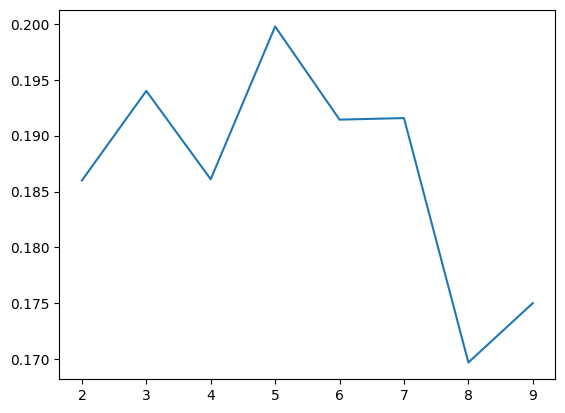

In [236]:
ss = []

for i in range(2, 10):
  ss.append(silhouette_score(data2, KMeans(i, n_init='auto').fit(data2).labels_))

plt.plot(range(2,10), ss)

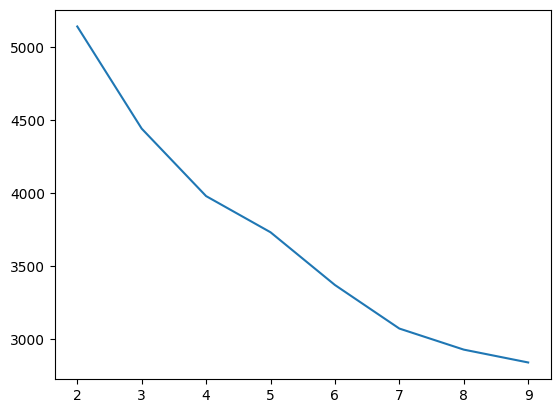

In [237]:
inertias = []

for i in range(2, 10):
  m = KMeans(i, n_init='auto').fit(data3)
  inertias.append(m.inertia_)

plt.plot(range(2,10), inertias)

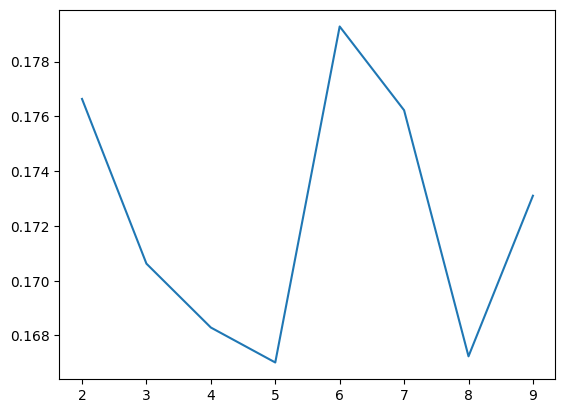

In [238]:
ss = []

for i in range(2, 10):
  ss.append(silhouette_score(data3, KMeans(i, n_init='auto').fit(data3).labels_))

plt.plot(range(2,10), ss)

Ну подобранные гиперпараметры благодаря методам локтя и силуэта не совпали ни в одном из случаев. Будем использовать те, которые получили при помощи метода локтя.

## Итоговые kmeans

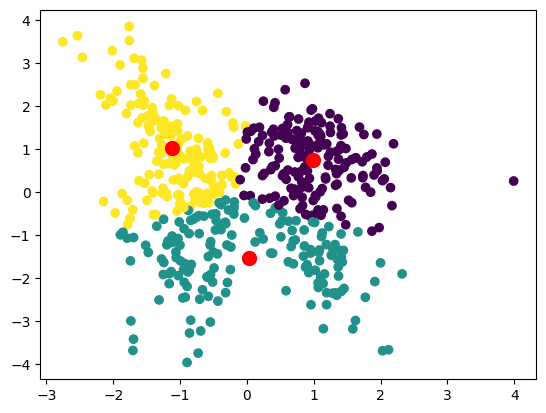

In [239]:
kmeans1 = KMeans(3, n_init='auto').fit(data1)

plt.scatter(data1[:,0], data1[:,1], c=kmeans1.labels_)
plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,1], s=100, c='red')

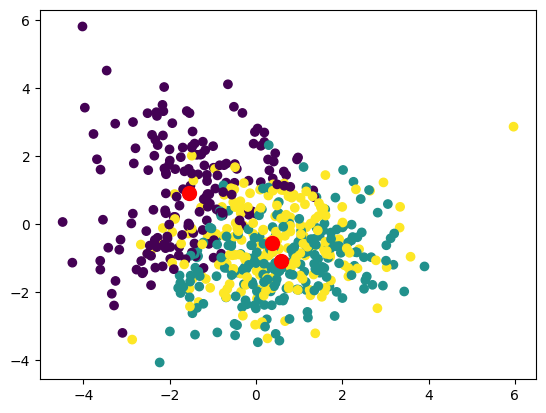

In [240]:
kmeans2 = KMeans(3, n_init='auto').fit(data2)

plt.scatter(data2[:,0], data2[:,1], c=kmeans2.labels_)
plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], s=100, c='red')

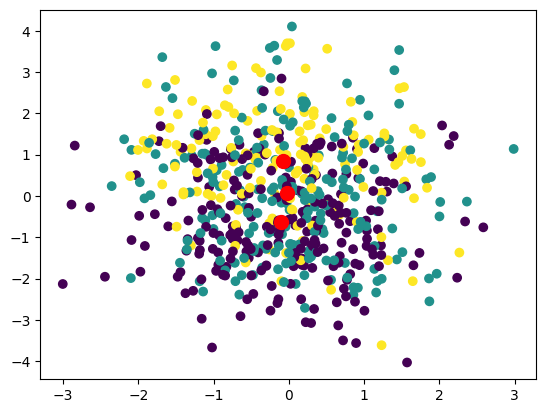

In [241]:
kmeans3 = KMeans(3, n_init='auto').fit(data3)

plt.scatter(data3[:,0], data3[:,1], c=kmeans3.labels_)
plt.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], s=100, c='red')

На полученные кластерах посмотрим внешние и внутренние метрики

In [242]:
def rand(labels1, datay1,labels2, datay2,labels3, datay3):
    print(f"Результаты первого теста {rand_score(labels1, datay1)}")
    print(f"Результаты второго теста {rand_score(labels2, datay2)}")
    print(f"Результаты третьего теста {rand_score(labels3, datay3)}")

In [243]:
import sklearn
from sklearn.metrics.cluster import homogeneity_score #однородность кластеров (условно говоря: чем больше, тем меньше обьетов из разных классов попали в один)

def homogeneity(datay1, labels1, datay2, labels2, datay3, labels3):
    print(f"Результаты первого теста {sklearn.metrics.homogeneity_score(datay1, labels1)}")
    print(f"Результаты второго теста {sklearn.metrics.homogeneity_score(datay2, labels2)}")
    print(f"Результаты третьего теста {sklearn.metrics.homogeneity_score(datay3, labels3)}", end="\n\n")

In [244]:
homogeneity(data_y1, kmeans1.labels_, data_y2, kmeans2.labels_, data_y3, kmeans3.labels_)
rand(kmeans1.labels_, data_y1, kmeans2.labels_, data_y2, kmeans3.labels_, data_y3)

Результаты первого теста 0.5125261551338697
Результаты второго теста 0.03187466423059345
Результаты третьего теста 0.12406580414398209

Результаты первого теста 0.6871102204408818
Результаты второго теста 0.5698998330550918
Результаты третьего теста 0.6305230940456316


ну так хоть немного лучше, посмотрим внутренние метрики)

In [245]:
def silhouette(data1, labels1, data2, labels2, data3, labels3):
    print(f"Результаты первого теста {silhouette_score(data1, labels1)}")
    print(f"Результаты второго теста {silhouette_score(data2, labels2)}")
    print(f"Результаты третьего теста {silhouette_score(data3, labels3)}")

In [246]:
from sklearn.metrics import calinski_harabasz_score #Это соотношение между межгрупповой дисперсией и внутригрупповой дисперсией

def calinski(data1, labels1, data2, labels2, data3, labels3):
    print(f"Результаты первого теста {calinski_harabasz_score(data1, labels1)}")
    print(f"Результаты второго теста {calinski_harabasz_score(data2, labels2)}")
    print(f"Результаты третьего теста {calinski_harabasz_score(data3, labels3)}", end="\n\n")

In [247]:
calinski(data1, kmeans1.labels_, data2, kmeans2.labels_, data3, kmeans3.labels_)
silhouette(data1, kmeans1.labels_, data2, kmeans2.labels_, data3, kmeans3.labels_)

Результаты первого теста 395.92730728585576
Результаты второго теста 148.59991879569392
Результаты третьего теста 125.0596335566521

Результаты первого теста 0.39445461541829063
Результаты второго теста 0.19443491033707624
Результаты третьего теста 0.17062320964197927


## Gaussian Mixtures

## Модели

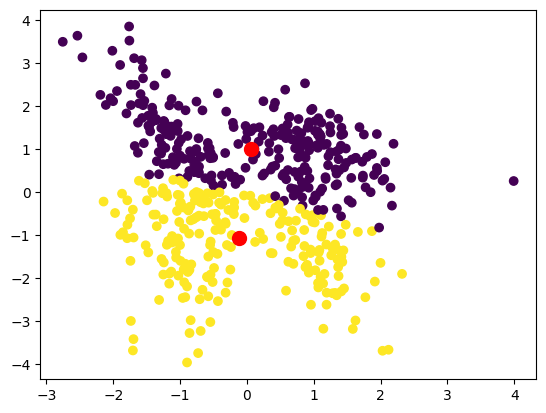

In [248]:
from sklearn.mixture import GaussianMixture

gm1 = GaussianMixture(n_components=2).fit(data1)
pred1 = gm1.predict(data1)

plt.scatter(data1[:,0], data1[:,1], c=gm1.predict(data1))
plt.scatter(gm1.means_[:,0], gm1.means_[:,1], s=100, c='red')

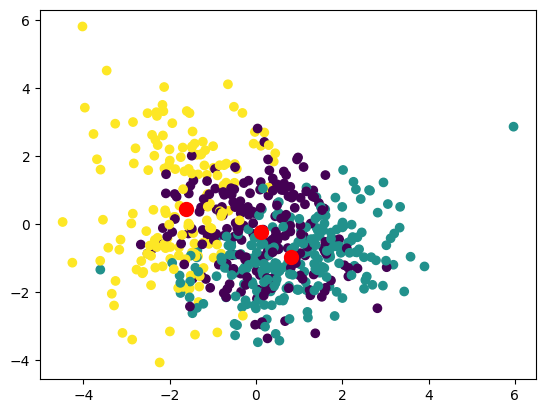

In [249]:
gm2 = GaussianMixture(n_components=3).fit(data2)
pred2 = gm2.predict(data2)

plt.scatter(data2[:,0], data2[:,1], c=gm2.predict(data2))
plt.scatter(gm2.means_[:,0], gm2.means_[:,1], s=100, c='red')

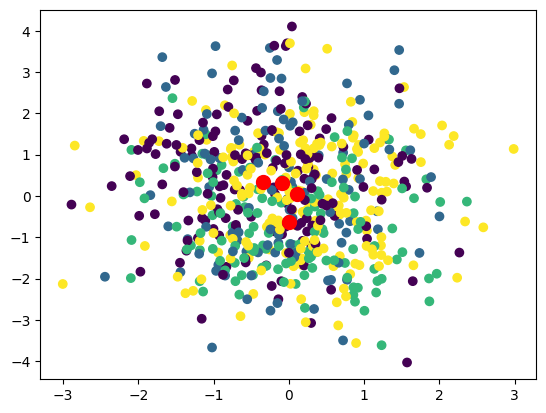

In [250]:
gm3 = GaussianMixture(n_components=4).fit(data3)

pred3 = gm3.predict(data3)
plt.scatter(data3[:,0], data3[:,1], c=gm3.predict(data3))
plt.scatter(gm3.means_[:,0], gm3.means_[:,1], s=100, c='red')

## Метрики

In [251]:
homogeneity(data_y1, pred1, data_y2, pred2, data_y3, pred3)
rand(pred1, data_y1, pred2, data_y2, pred3, data_y3)

Результаты первого теста 0.03563384342516247
Результаты второго теста 0.022147982619542764
Результаты третьего теста 0.1873085548491386

Результаты первого теста 0.5232464929859719
Результаты второго теста 0.5627100723427936
Результаты третьего теста 0.6858597662771285


In [252]:
calinski(data1, pred1, data2, pred2, data3, pred3)
silhouette(data1, pred1, data2, pred2, data3, pred3)

Результаты первого теста 325.9519103094159
Результаты второго теста 127.60084529871533
Результаты третьего теста 77.82864212908787

Результаты первого теста 0.35763147981784227
Результаты второго теста 0.16876614036159798
Результаты третьего теста 0.09908961471924338


## Иерархическая кластеризация

## Определение кол ва кластероу

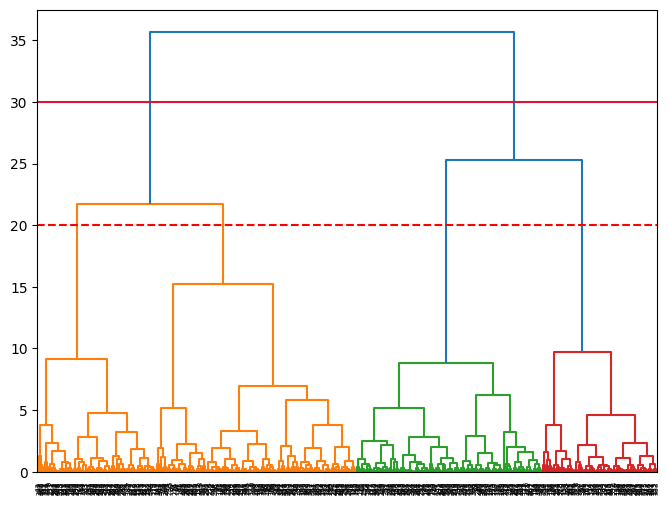

In [253]:
from scipy.cluster import hierarchy

clusters = hierarchy.linkage(data1, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters
plt.axhline(20, color='red', linestyle='--');
# Plotting a horizontal line based on the second biggest distance between clusters
plt.axhline(30, color='crimson');

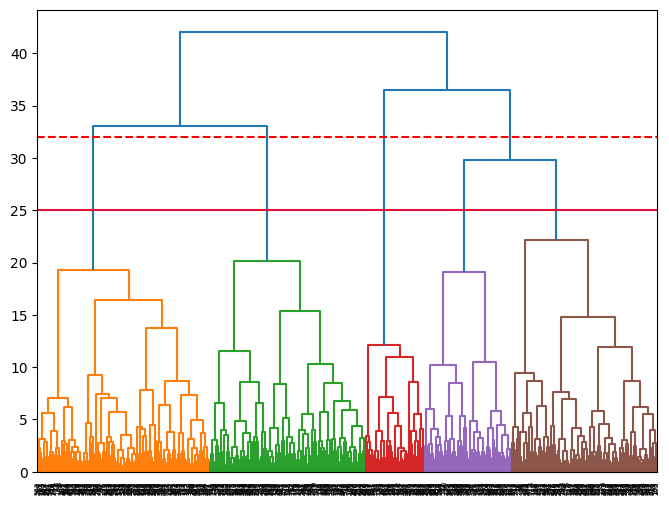

In [254]:
clusters = hierarchy.linkage(data2, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters
plt.axhline(32, color='red', linestyle='--');
# Plotting a horizontal line based on the second biggest distance between clusters
plt.axhline(25, color='crimson');

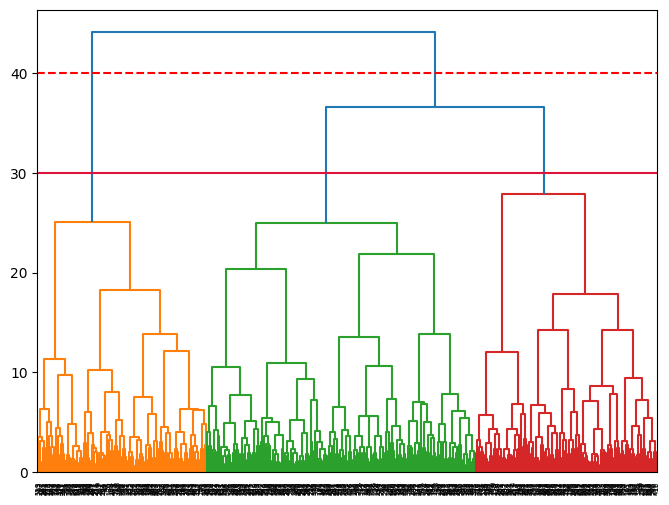

In [255]:
clusters = hierarchy.linkage(data3, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters
plt.axhline(40, color='red', linestyle='--');
# Plotting a horizontal line based on the second biggest distance between clusters
plt.axhline(30, color='crimson');

## Сами модели

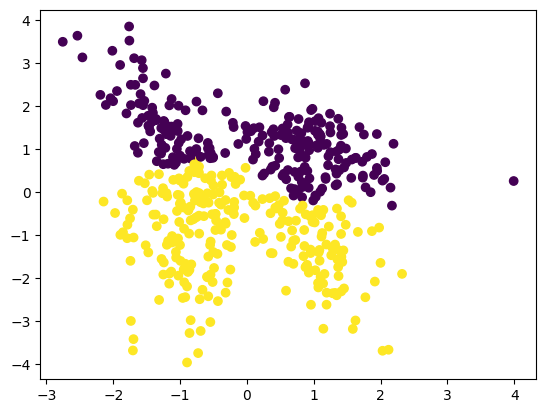

In [256]:
from sklearn.cluster import AgglomerativeClustering

clustering1 = AgglomerativeClustering(n_clusters=2, linkage="ward").fit(data1)
plt.scatter(data1[:,0], data1[:,1], c=clustering1.labels_)

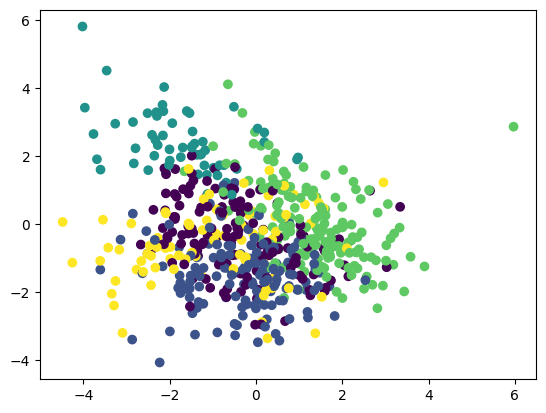

In [257]:
clustering2 = AgglomerativeClustering(n_clusters=5, linkage="ward").fit(data2)
plt.scatter(data2[:,0], data2[:,1], c=clustering2.labels_)

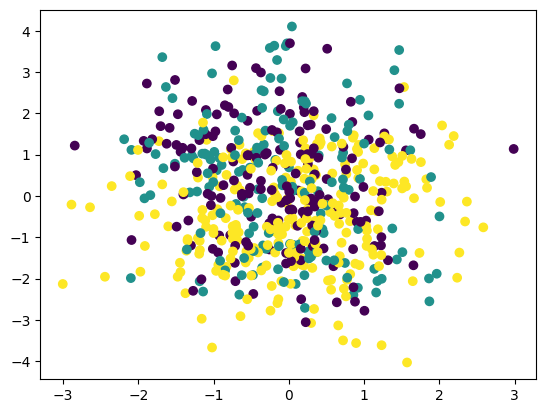

In [258]:
clustering3 = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(data3)
plt.scatter(data3[:,0], data3[:,1], c=clustering3.labels_)

## Метрики:

In [259]:
homogeneity(data_y1, clustering1.labels_, data_y2, clustering2.labels_, data_y3, clustering3.labels_)
rand(clustering1.labels_, data_y1, clustering2.labels_, data_y2, clustering3.labels_, data_y3)

Результаты первого теста 0.052492601994612434
Результаты второго теста 0.1611729905652554
Результаты третьего теста 0.11993781483428853

Результаты первого теста 0.5349819639278557
Результаты второго теста 0.6319643850862549
Результаты третьего теста 0.6281803005008347


In [260]:
calinski(data1, clustering1.labels_, data2, clustering2.labels_, data3, clustering3.labels_)
silhouette(data1, clustering1.labels_, data2, clustering2.labels_, data3, clustering3.labels_)

Результаты первого теста 306.86979291921836
Результаты второго теста 102.40396144512154
Результаты третьего теста 105.08031550758531

Результаты первого теста 0.3430783379081443
Результаты второго теста 0.1534760118068665
Результаты третьего теста 0.14096838437198378


Ето одна из лучших моделей

## DBSCAN

In [261]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=4).fit(data1)
distances, indices = nbrs.kneighbors(data1)

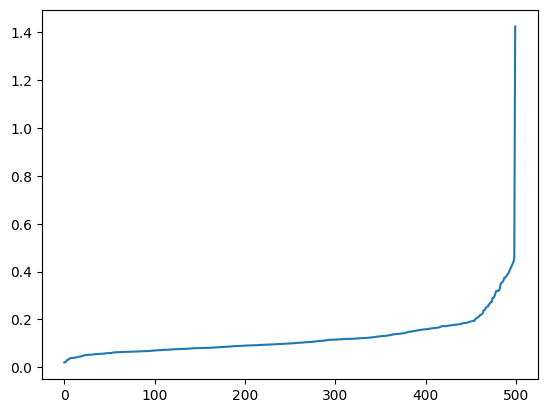

In [262]:
distances = np.mean(distances, axis=1)
distances = np.sort(distances)

plt.plot(distances)

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


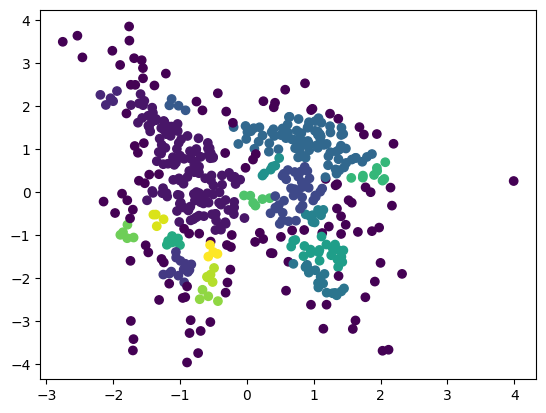

In [263]:
from sklearn.cluster import DBSCAN

dbscan1 = DBSCAN(eps = 0.2 ,min_samples=4).fit(data1)

print(np.unique(dbscan1.labels_))
plt.scatter(data1[:,0], data1[:,1], c=dbscan1.labels_)

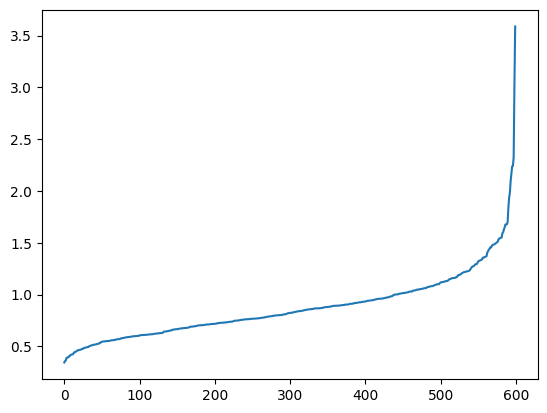

In [264]:
nbrs = NearestNeighbors(n_neighbors=4).fit(data2)
distances, indices = nbrs.kneighbors(data2)

distances = np.mean(distances, axis=1)
distances = np.sort(distances)

plt.plot(distances)

[-1  0  1  2  3  4  5  6]


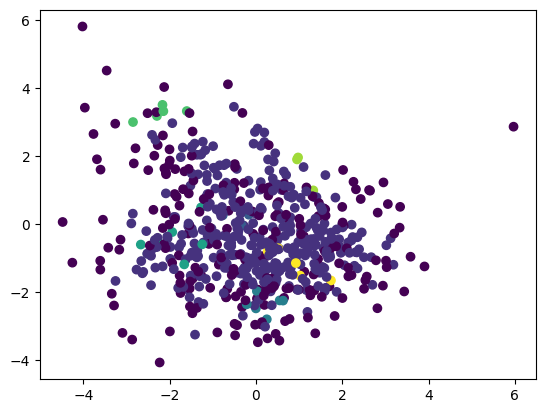

In [265]:
dbscan2 = DBSCAN(eps=1.2 ,min_samples=4).fit(data2)

print(np.unique(dbscan2.labels_))
plt.scatter(data2[:,0], data2[:,1], c=dbscan2.labels_)

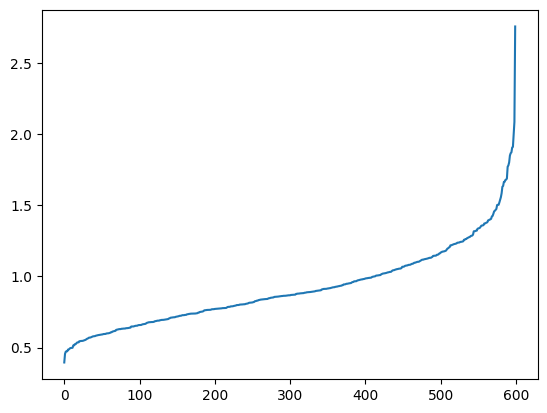

In [266]:
nbrs = NearestNeighbors(n_neighbors=4).fit(data3)
distances, indices = nbrs.kneighbors(data3)

distances = np.mean(distances, axis=1)
distances = np.sort(distances)

plt.plot(distances)

[-1  0  1  2  3  4  5  6  7  8]


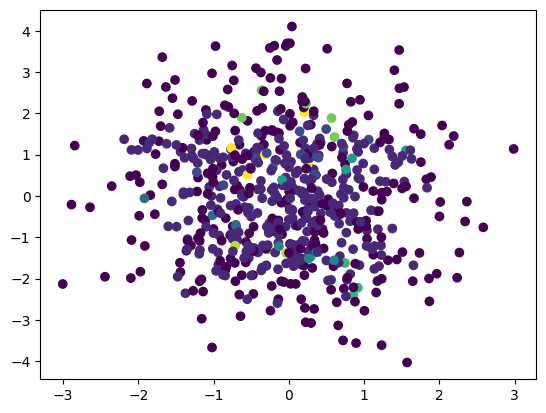

In [267]:
dbscan3 = DBSCAN(eps=1.2 ,min_samples=4).fit(data3)

print(np.unique(dbscan3.labels_))
plt.scatter(data3[:,0], data3[:,1], c=dbscan3.labels_)

In [268]:
homogeneity(data_y1, dbscan1.labels_, data_y2, dbscan2.labels_, data_y3, dbscan3.labels_)
rand(clustering1.labels_, data_y1, clustering2.labels_, data_y2, clustering3.labels_, data_y3)

Результаты первого теста 0.7049336238350917
Результаты второго теста 0.0337863221755967
Результаты третьего теста 0.05634018710410447

Результаты первого теста 0.5349819639278557
Результаты второго теста 0.6319643850862549
Результаты третьего теста 0.6281803005008347


In [269]:
calinski(data1, dbscan1.labels_, data2, dbscan2.labels_, data3, dbscan3.labels_)
silhouette(data1, dbscan1.labels_, data2, dbscan2.labels_, data3, dbscan3.labels_)

Результаты первого теста 23.64840989278545
Результаты второго теста 6.051011717069384
Результаты третьего теста 5.198792111902653

Результаты первого теста -0.10816056909372972
Результаты второго теста -0.21433394789957874
Результаты третьего теста -0.2337469371486326


## Задание 2

In [2]:
import pandas as pd

In [5]:
df = pd.read_csv('../data/card_transdata.csv')

df['used_chip'] = df['used_chip'].astype(int)
df['repeat_retailer'] = df['repeat_retailer'].astype(int)
df['used_pin_number'] = df['used_pin_number'].astype(int)
df['online_order'] = df['online_order'].astype(int)
df['fraud'] = df['fraud'].astype(int)

df.head(10)



,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0
5,5.586408,13.261073,0.064768,1,0,0,0,0
6,3.724019,0.956838,0.278465,1,0,0,1,0
7,4.848247,0.320735,1.273050,1,0,1,0,0
8,0.876632,2.503609,1.516999,0,0,0,0,0
9,8.839047,2.970512,2.361683,1,0,0,1,0


In [6]:
df_y=np.array(df['fraud'])[:1500]
df=df.drop(['fraud'], axis = 1)
df_y

array([0, 0, 0, ..., 0, 0, 0])

In [7]:
df = np.array(df)[:1500]

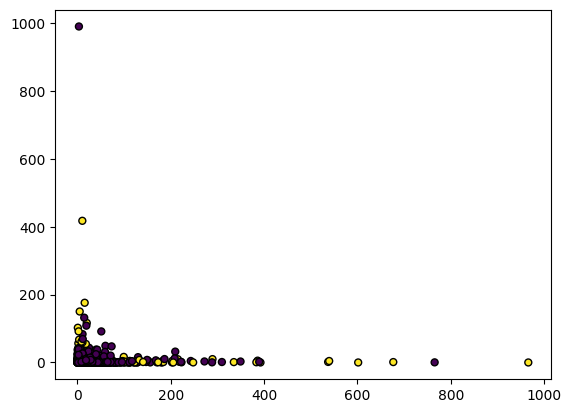

In [8]:
plt.scatter(df[:, 0], df[:, 1], marker="o", c=df_y, s=25, edgecolor="k")
plt.show()

## Kmeans:

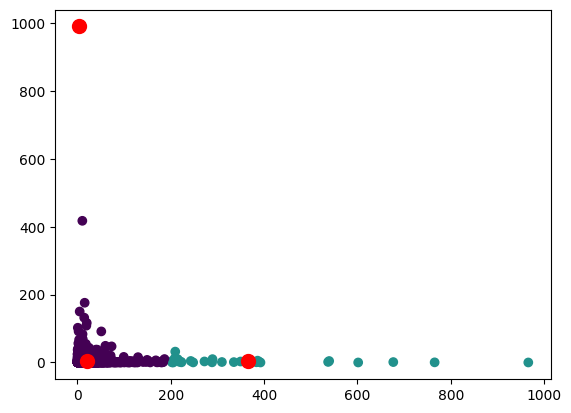

In [11]:
kmeans = KMeans(3, n_init='auto').fit(df)

plt.scatter(df[:,0], df[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')

In [ ]:
import pickle
with open("Kmeans.pickle", "wb") as f:
        pickle.dump(kmeans, f)

In [276]:
print(f"Результаты теста {rand_score(kmeans.labels_, df_y)}")
print(f"Результаты теста {sklearn.metrics.homogeneity_score(df_y, kmeans.labels_)}")

Результаты первого теста 0.8426977985323549
Результаты первого теста 0.0955778695871593


In [277]:
print(f"Результаты теста {silhouette_score(df, kmeans.labels_)}")
print(f"Результаты теста {calinski_harabasz_score(df, kmeans.labels_)}")

Результаты первого теста 0.8314264863720465
Результаты первого теста 1306.578657613658


## Иерархическая кластер

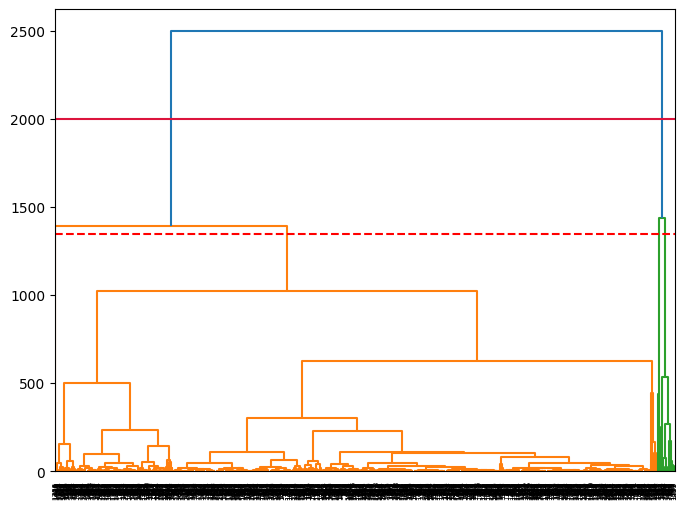

In [278]:
clusters = hierarchy.linkage(df, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters
plt.axhline(1350, color='red', linestyle='--');
# Plotting a horizontal line based on the second biggest distance between clusters
plt.axhline(2000, color='crimson');

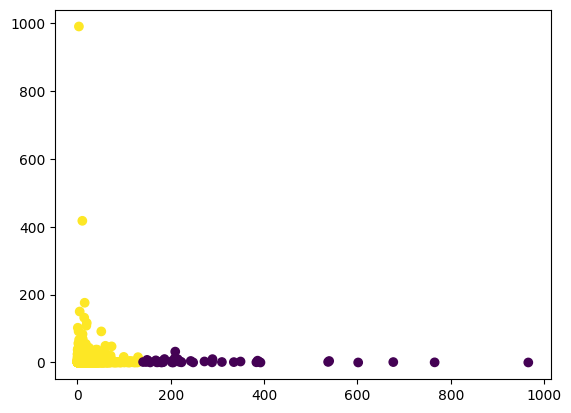

In [279]:
clustering = AgglomerativeClustering(n_clusters=2, linkage="ward").fit(df)
plt.scatter(df[:,0], df[:,1], c=clustering.labels_)

In [280]:
print(f"Результаты первого теста {rand_score(clustering.labels_, df_y)}")
print(f"Результаты первого теста {sklearn.metrics.homogeneity_score(df_y, clustering.labels_)}")

Результаты первого теста 0.8449001556593284
Результаты первого теста 0.06505164318406698


In [281]:
print(f"Результаты первого теста {silhouette_score(df, clustering.labels_)}")
print(f"Результаты первого теста {calinski_harabasz_score(df, clustering.labels_)}")

Результаты первого теста 0.8824667236771362
Результаты первого теста 1339.5957613013115


## DBSCAN

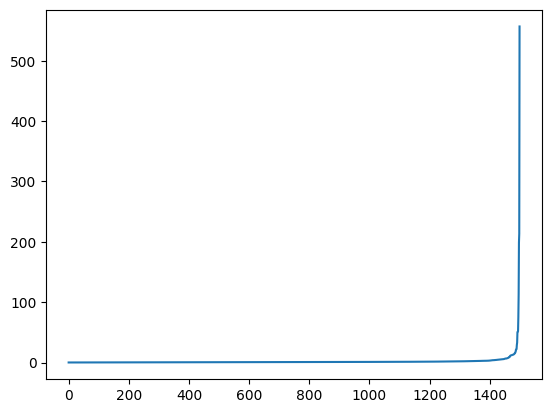

In [282]:
nbrs = NearestNeighbors(n_neighbors=4).fit(df)
distances, indices = nbrs.kneighbors(df)

distances = np.mean(distances, axis=1)
distances = np.sort(distances)

plt.plot(distances)

[-1  0  1  2  3  4  5  6]


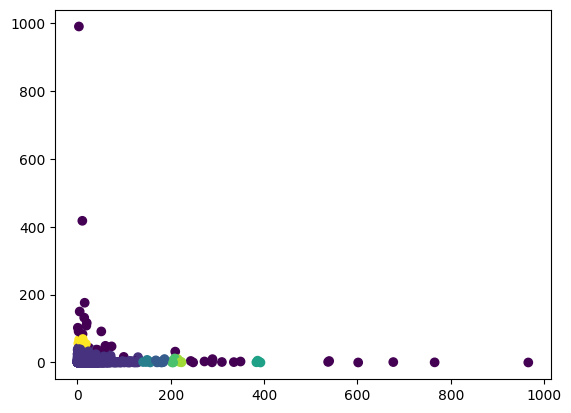

In [283]:
dbscan = DBSCAN(eps=10 ,min_samples=4).fit(df)

print(np.unique(dbscan.labels_))
plt.scatter(df[:,0], df[:,1], c=dbscan.labels_)

In [284]:
print(f"Результаты первого теста {rand_score(kmeans.labels_, df_y)}")
print(f"Результаты первого теста {sklearn.metrics.homogeneity_score(df_y, kmeans.labels_)}")

Результаты первого теста 0.8426977985323549
Результаты первого теста 0.0955778695871593


In [285]:
print(f"Результаты первого теста {silhouette_score(df, dbscan.labels_)}")
print(f"Результаты первого теста {calinski_harabasz_score(df, dbscan.labels_)}")

Результаты первого теста 0.5711887786039133
Результаты первого теста 131.40858500070613


## Kmeans сам написал да

In [313]:
class Kmeans:
    def __init__(self, centers = 2) -> None:
        self._centersCount = centers

    def fit(self, data) -> None:
        self.centers = data[np.random.choice(data.shape[0], self._centersCount, replace=False)]
        self.lastCenters = data[np.random.choice(data.shape[0], self._centersCount, replace=False)]
        
        self.centers = self._findCenters(data)

    def predict(self, data) -> None:
        distances = self._findDistance(data, self.centers)
        return np.argmin(distances, axis = 1)

    def _findCenters(self, data) -> np.array:
        
        if(self._findMaxDistanceBetweenLastAndNewCenters(self.centers, self.lastCenters)<0.5):
            return self.centers
            
        distances = self._findDistance(data, self.centers)
        classes = np.argmin(distances, axis=1)
        self.lastCenters = self.centers
        self.centers = np.array([np.mean(data[classes == i], axis=0) for i in range(self._centersCount)])
        self._findCenters(data)

    def _findDistance(self, x, y) -> list:
        return np.sqrt(np.sum((x[:, np.newaxis] - y) ** 2, axis=1))

    def _findMaxDistanceBetweenLastAndNewCenters(self, centers, lastCenters)-> float:
        return np.argmax(map(lambda X,Y: np.sqrt(np.sum(map(lambda x,y: (x-y)**2,X,Y))), centers, lastCenters))
        

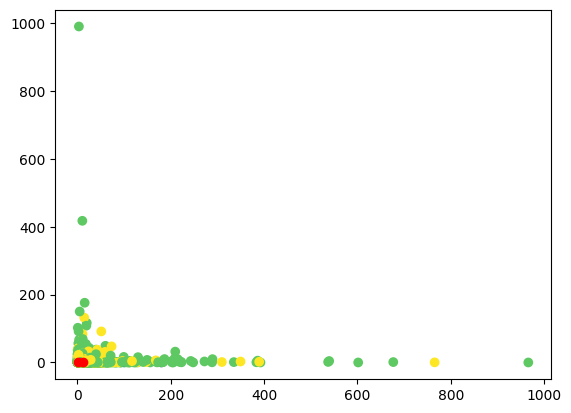

In [314]:
kmeans = Kmeans(2)
kmeans.fit(df)

y_pred = kmeans.predict(df)

plt.scatter(df[:, 0], df[:, 1], c=y_pred)
plt.scatter(kmeans.centers[:, 0], kmeans.centers[:, 1], marker='o', c='r')
plt.show()

In [315]:
print(f"Результаты теста {rand_score(y_pred, df_y)}")
print(f"Результаты теста {sklearn.metrics.homogeneity_score(df_y, y_pred)}")

print(f"Результаты теста {silhouette_score(df, y_pred)}")
print(f"Результаты теста {calinski_harabasz_score(df, y_pred)}")

Результаты теста 0.516078274405159
Результаты теста 0.01994455862729089
Результаты теста -0.5230268269620181
Результаты теста 0.5249460084336263
